Loading Dataset

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
import pandas as pd
df =pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Data Preparation

In [3]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Cek variansi spesies


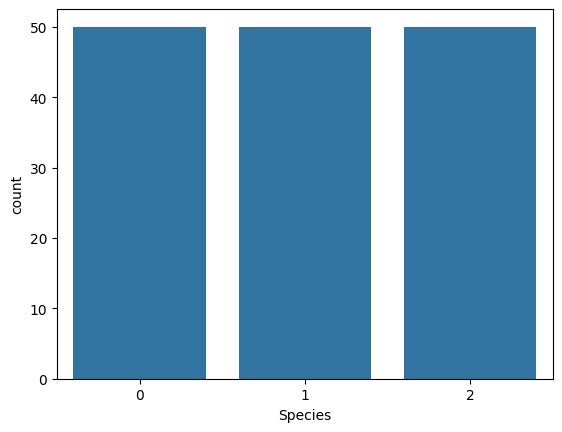

In [18]:
sns.countplot(x="Species", data=df)
plt.show()

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Pemilihan Fitur

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode Species
df["SpeciesEncoded"] = le.fit_transform(df["Species"])

# Encode Id
df["IdEncoded"] = le.fit_transform(df["Id"])


In [23]:
X = df.drop(["Id", "Species", "SpeciesEncoded"], axis=1)


In [24]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,IdEncoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,4
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,145
146,6.3,2.5,5.0,1.9,146
147,6.5,3.0,5.2,2.0,147
148,6.2,3.4,5.4,2.3,148


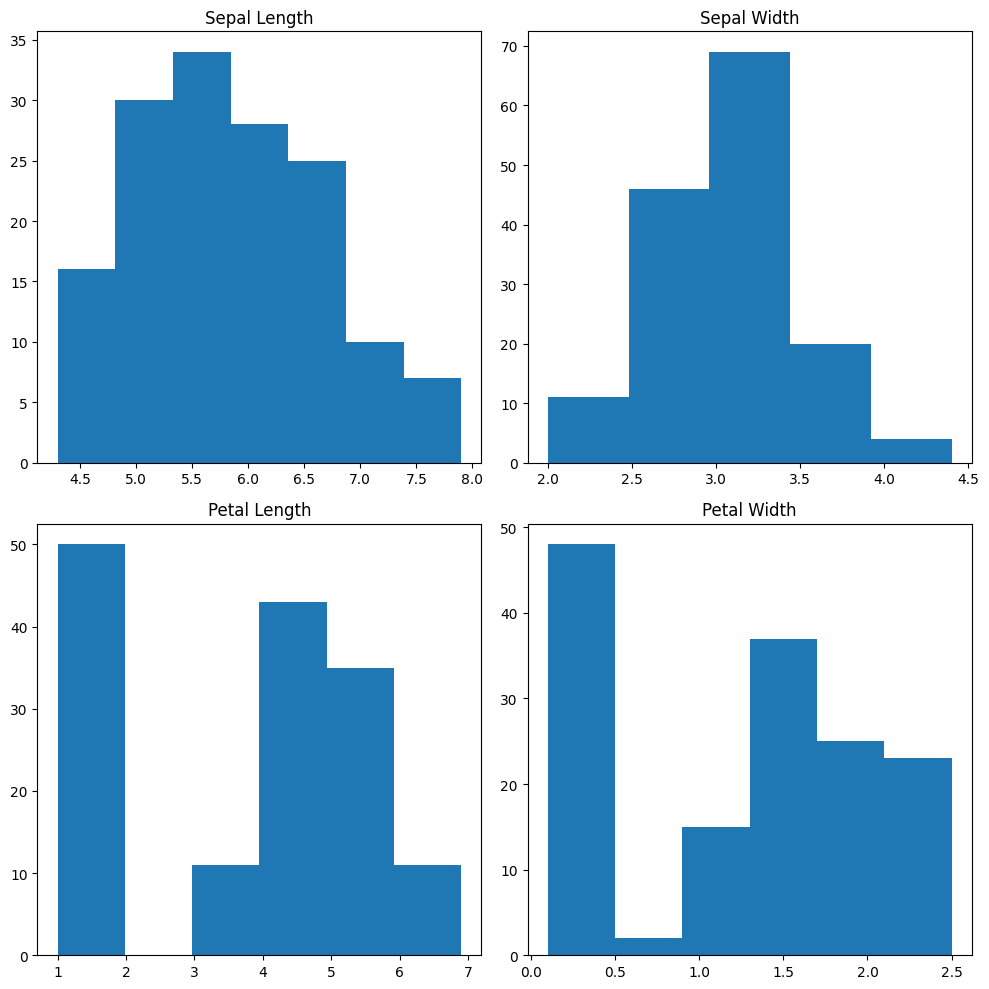

In [25]:
from matplotlib import axes
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Histogram 1: Sepal Length
axes[0, 0].set_title("Sepal Length")
axes[0, 0].hist(X['SepalLengthCm'], bins=7)

# Histogram 2: Sepal Width
axes[0, 1].set_title("Sepal Width")
axes[0, 1].hist(X['SepalWidthCm'], bins=5)

# Histogram 3: Petal Length
axes[1, 0].set_title("Petal Length")
axes[1, 0].hist(X['PetalLengthCm'], bins=6)

# Histogram 4: Petal Width
axes[1, 1].set_title("Petal Width")
axes[1, 1].hist(X['PetalWidthCm'], bins=6)

plt.tight_layout()
plt.show()

StandardScaler

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

Menentukan jumlah Cluster yang optimal

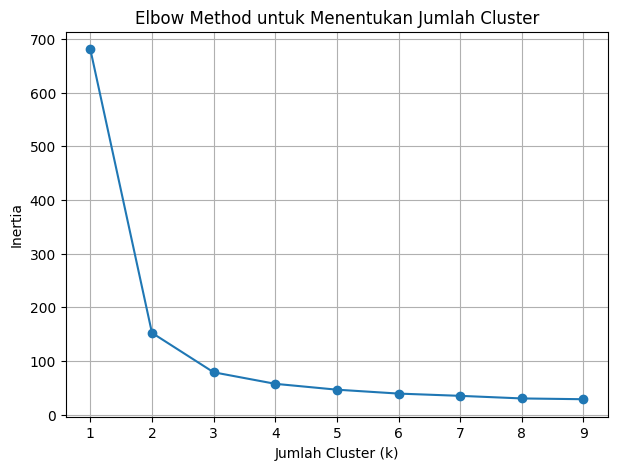

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia_list, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,      # Karena dataset Iris memiliki 3 spesies
    init="k-means++",
    random_state=42
)

df["Cluster"] = kmeans.fit_predict(X)

print("Cluster ditemukan:", df["Cluster"].unique())

Cluster ditemukan: [1 0 2]


In [46]:
kmeans.fit(X)


KMeans(n_clusters=3, random_state=42)

In [42]:
labels = kmeans.predict(X)

In [43]:
df["Cluster"] = labels

In [47]:
print("Cluster ditemukan:",df["Cluster"].unique())

Cluster ditemukan: [1 0 2]


In [48]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, df["Cluster"])
print("===== SILHOUETTE SCORE =====")
print("Silhouette Score:", sil_score)


===== SILHOUETTE SCORE =====
Silhouette Score: 0.5509643746707443


In [49]:
from sklearn.metrics import confusion_matrix, classification_report

print("===== CONFUSION MATRIX =====")

cm = confusion_matrix(df["SpeciesEncoded"], df["Cluster"])
print(cm)


===== CONFUSION MATRIX =====
[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


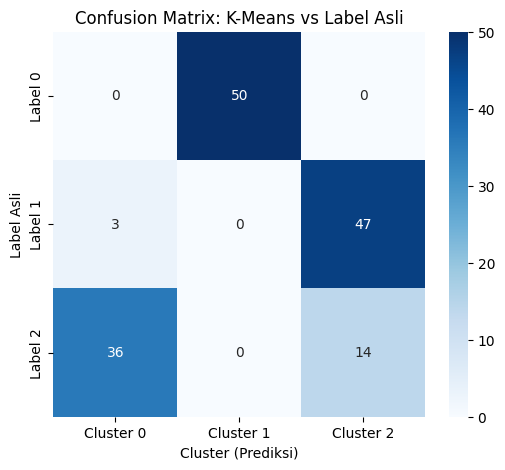

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['Label 0', 'Label 1', 'Label 2'])

plt.xlabel("Cluster (Prediksi)")
plt.ylabel("Label Asli")
plt.title("Confusion Matrix: K-Means vs Label Asli")
plt.show()


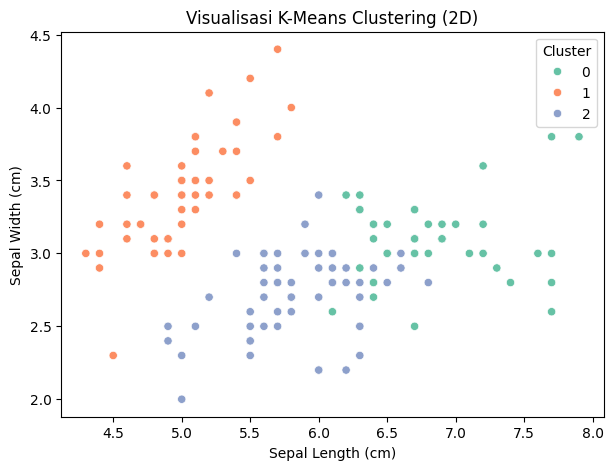

In [35]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=df["SepalLengthCm"],
    y=df["SepalWidthCm"],
    hue=df["Cluster"],
    palette="Set2"
)

plt.title("Visualisasi K-Means Clustering (2D)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()


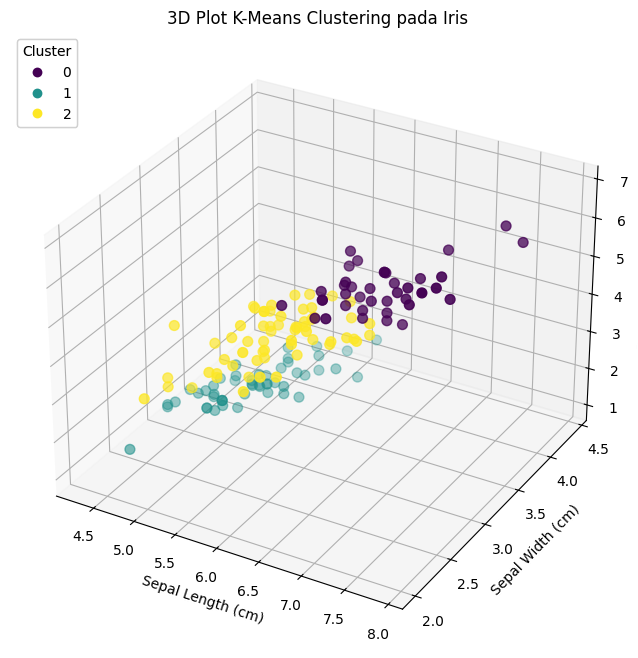

In [37]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot 3D
scatter = ax.scatter(
    df['SepalLengthCm'],
    df['SepalWidthCm'],
    df['PetalLengthCm'],
    c=df['Cluster'],
    cmap='viridis',
    s=50
)

ax.set_title("3D Plot K-Means Clustering pada Iris")
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Sepal Width (cm)")
ax.set_zlabel("Petal Length (cm)")

# Tambahkan legenda cluster
legend1 = ax.legend(*scatter.legend_elements(),
                    title="Cluster",
                    loc="upper left")
ax.add_artist(legend1)

plt.show()
